In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split,cross_val_score

In [0]:
train_raw = pd.read_csv('/content/drive/My Drive/Hackathon/AIRPLANE ACCIDENT/train.csv')
test_raw = pd.read_csv('/content/drive/My Drive/Hackathon/AIRPLANE ACCIDENT/test.csv')

In [0]:
train = train_raw.copy(deep=True)
test = test_raw.copy(deep=True)

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
Severity                   10000 non-null object
Safety_Score               10000 non-null float64
Days_Since_Inspection      10000 non-null int64
Total_Safety_Complaints    10000 non-null int64
Control_Metric             10000 non-null float64
Turbulence_In_gforces      10000 non-null float64
Cabin_Temperature          10000 non-null float64
Accident_Type_Code         10000 non-null int64
Max_Elevation              10000 non-null float64
Violations                 10000 non-null int64
Adverse_Weather_Metric     10000 non-null float64
Accident_ID                10000 non-null int64
dtypes: float64(6), int64(5), object(1)
memory usage: 937.6+ KB


In [6]:
train.sample(5)

,Severity,Safety_Score,Days_Since_Inspection,Total_Safety_Complaints,Control_Metric,Turbulence_In_gforces,Cabin_Temperature,Accident_Type_Code,Max_Elevation,Violations,Adverse_Weather_Metric,Accident_ID
1760,Highly_Fatal_And_Damaging,33.972603,11,5,57.520510,0.428627,78.06,1,29989.026584,2,1.103235,8770
1120,Highly_Fatal_And_Damaging,36.164384,11,1,70.009116,0.211894,81.26,2,32421.108119,2,0.438779,7993
4503,Significant_Damage_And_Fatalities,25.890411,14,0,40.474020,0.598118,82.72,4,27012.001546,2,0.049086,6611
4408,Highly_Fatal_And_Damaging,13.652968,17,12,63.309025,0.306737,79.67,1,44290.070230,2,1.616435,6275
4548,Highly_Fatal_And_Damaging,42.648402,9,10,70.282589,0.346766,80.71,4,25227.608740,3,0.045245,8573


In [7]:
train['Severity'].unique()

array(['Minor_Damage_And_Injuries', 'Significant_Damage_And_Fatalities',
       'Significant_Damage_And_Serious_Injuries',
       'Highly_Fatal_And_Damaging'], dtype=object)

In [8]:
train['Accident_Type_Code'].unique()

array([2, 7, 3, 4, 1, 6, 5])

In [9]:
train['Violations'].unique()

array([3, 2, 1, 0, 4, 5])

In [10]:
train['Total_Safety_Complaints'].unique()

array([22, 27, 16,  9, 25,  0, 10,  4, 40, 11,  2, 14,  1,  3,  5,  7, 20,
       28, 12,  8, 15, 18, 35,  6, 17, 13, 19, 31, 33, 26, 29, 24, 21, 30,
       44, 39, 34, 23, 54, 32, 37, 36, 38, 43])

In [11]:
train.Severity.value_counts()

Highly_Fatal_And_Damaging                  3049
Significant_Damage_And_Serious_Injuries    2729
Minor_Damage_And_Injuries                  2527
Significant_Damage_And_Fatalities          1695
Name: Severity, dtype: int64

In [0]:
#target_encoding = {'Minor_Damage_And_Injuries':1,'Significant_Damage_And_Fatalities':2, 'Significant_Damage_And_Serious_Injuries':3,'Highly_Fatal_And_Damaging':4}

In [0]:
#train['Severity'].replace(target_encoding,inplace=True)

In [0]:
# create a labelencoder object
le = LabelEncoder()
# fit and transform on the data
train['Severity'] = le.fit_transform(train['Severity'])

In [15]:
train.Severity.value_counts()

0    3049
3    2729
1    2527
2    1695
Name: Severity, dtype: int64

In [0]:
train0 = train[(train['Severity']==0)==True]
train3 = train[(train['Severity']==3)==True]
train1 = train[(train['Severity']==1)==True]
train2 = train[(train['Severity']==2)==True]

In [0]:
# train = pd.concat([train0.head(2700),train1,train2,train3],axis=0)

In [18]:
train.shape

(10000, 12)

In [19]:
np.min(train)

Severity                     0.000000
Safety_Score                 0.000000
Days_Since_Inspection        1.000000
Total_Safety_Complaints      0.000000
Control_Metric               0.000000
Turbulence_In_gforces        0.134000
Cabin_Temperature           74.740000
Accident_Type_Code           1.000000
Max_Elevation              831.695553
Violations                   0.000000
Adverse_Weather_Metric       0.000316
Accident_ID                  2.000000
dtype: float64

In [20]:
np.max(train)

Severity                       3.000000
Safety_Score                 100.000000
Days_Since_Inspection         23.000000
Total_Safety_Complaints       54.000000
Control_Metric               100.000000
Turbulence_In_gforces          0.882648
Cabin_Temperature             97.510000
Accident_Type_Code             7.000000
Max_Elevation              64297.651218
Violations                     5.000000
Adverse_Weather_Metric         2.365378
Accident_ID                12500.000000
dtype: float64

In [21]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
Severity                   10000 non-null int64
Safety_Score               10000 non-null float64
Days_Since_Inspection      10000 non-null int64
Total_Safety_Complaints    10000 non-null int64
Control_Metric             10000 non-null float64
Turbulence_In_gforces      10000 non-null float64
Cabin_Temperature          10000 non-null float64
Accident_Type_Code         10000 non-null int64
Max_Elevation              10000 non-null float64
Violations                 10000 non-null int64
Adverse_Weather_Metric     10000 non-null float64
Accident_ID                10000 non-null int64
dtypes: float64(6), int64(6)
memory usage: 937.6 KB


In [22]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
Severity,10000.0,1.410400,1.182249,0.000000,0.000000,1.000000,3.000000,3.000000
Safety_Score,10000.0,41.876406,16.138072,0.000000,30.593607,41.278539,52.511416,100.000000
Days_Since_Inspection,10000.0,12.931100,3.539803,1.000000,11.000000,13.000000,15.000000,23.000000
Total_Safety_Complaints,10000.0,6.564300,6.971982,0.000000,2.000000,4.000000,9.000000,54.000000
Control_Metric,10000.0,65.145324,11.882934,0.000000,56.927985,65.587967,73.336372,100.000000
Turbulence_In_gforces,10000.0,0.381495,0.121301,0.134000,0.293665,0.365879,0.451346,0.882648
Cabin_Temperature,10000.0,79.969331,2.759739,74.740000,77.960000,79.540000,81.560000,97.510000
Accident_Type_Code,10000.0,3.814900,1.902577,1.000000,2.000000,4.000000,5.000000,7.000000
Max_Elevation,10000.0,32001.803282,9431.995196,831.695553,25757.636908,32060.336419,38380.641513,64297.651218
Violations,10000.0,2.012200,1.039980,0.000000,1.000000,2.000000,3.000000,5.000000


In [0]:

############################################ CHEKING THE Feature DISTRIBUTION ######################################

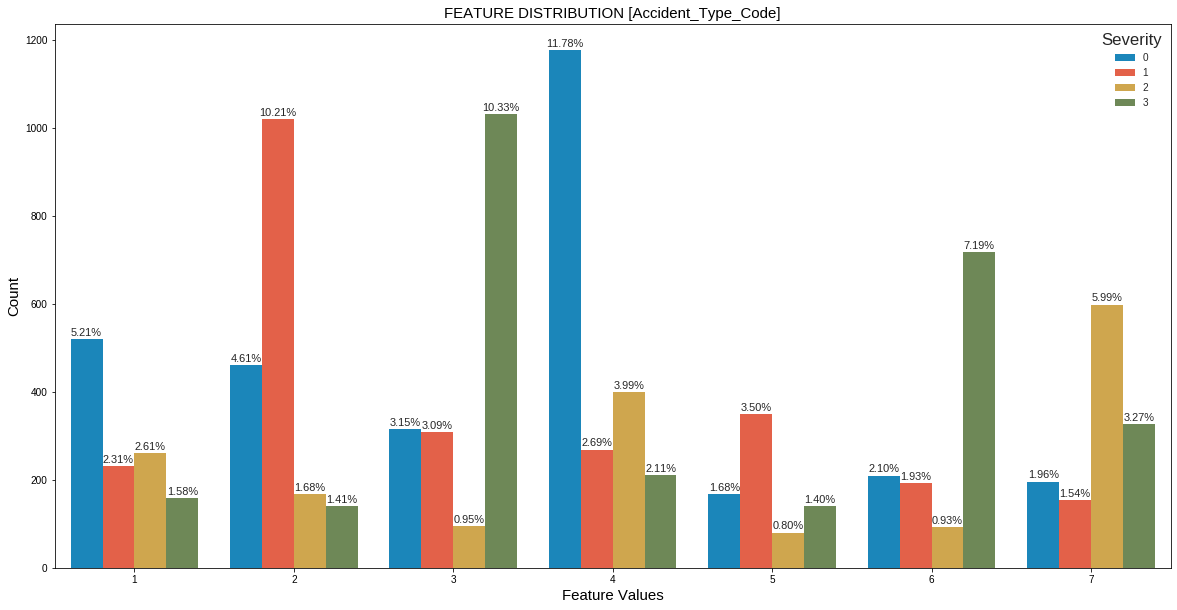

In [24]:
plt.subplots(1,1,figsize=(20,10)) 
plt.style.use('seaborn')
plt.style.use('fivethirtyeight') 
g = sns.countplot(x=train['Accident_Type_Code'], data=train,hue='Severity' )

g.set_title("FEATURE DISTRIBUTION [Accident_Type_Code]", fontsize = 15)
g.set_xlabel("Feature Values", fontsize = 15)
g.set_ylabel("Count", fontsize = 15)

for p in g.patches:
    g.annotate('{:1.2f}%'.format(p.get_height()/len(train)*100), (p.get_x() + p.get_width() / 2.,
                p.get_height()+5),  ha = 'center', va = 'center', xytext = (0, 4), textcoords = 'offset points', fontsize=11)
   
plt.show()


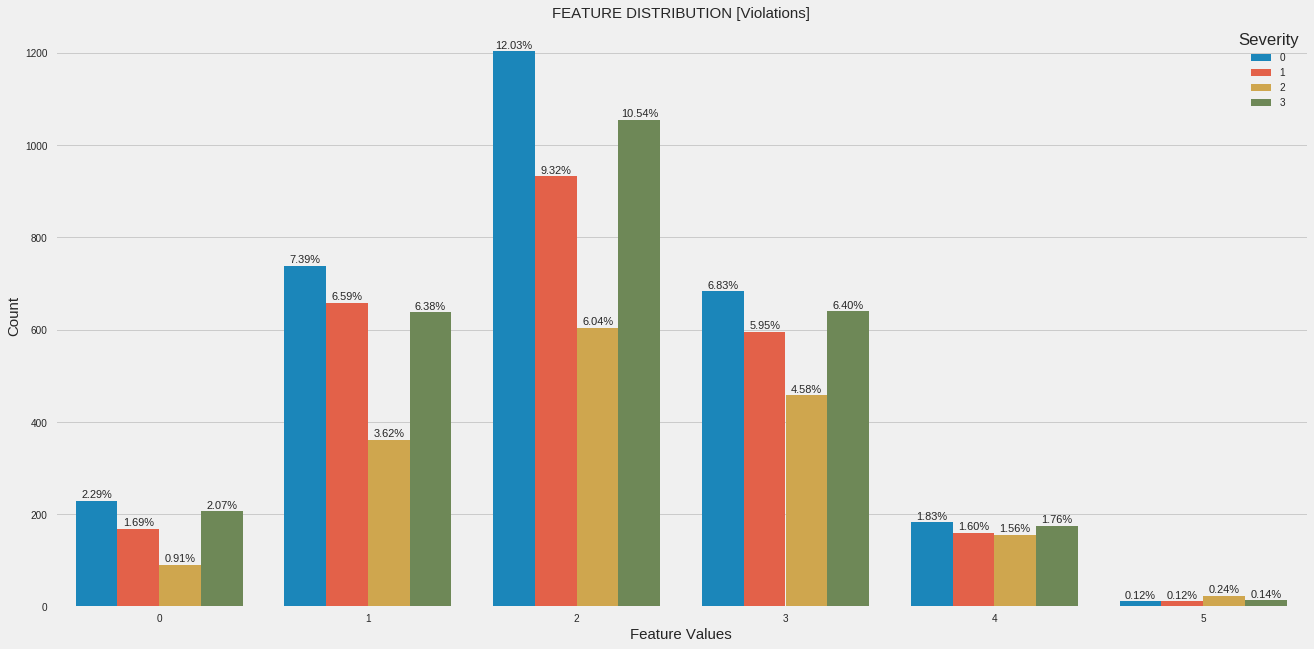

In [25]:
plt.subplots(1,1,figsize=(20,10)) 
plt.style.use('seaborn')
plt.style.use('fivethirtyeight') 
g = sns.countplot(x=train['Violations'], data=train,hue='Severity' )

g.set_title("FEATURE DISTRIBUTION [Violations]", fontsize = 15)
g.set_xlabel("Feature Values", fontsize = 15)
g.set_ylabel("Count", fontsize = 15)

for p in g.patches:
    g.annotate('{:1.2f}%'.format(p.get_height()/len(train)*100), (p.get_x() + p.get_width() / 2.,
                p.get_height()+5),  ha = 'center', va = 'center', xytext = (0, 4), textcoords = 'offset points', fontsize=11)
   
plt.show()


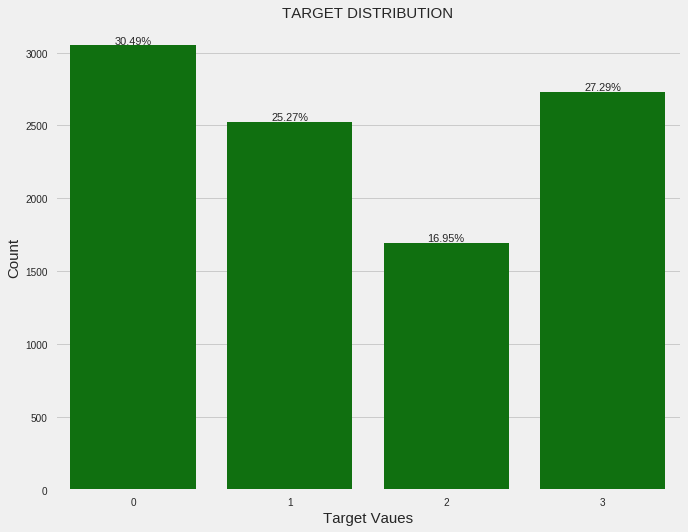

In [26]:
plt.subplots(1,1,figsize=(10,8)) 
plt.style.use('seaborn')
g = sns.countplot(x=train['Severity'], data=train, color='green')

g.set_title("TARGET DISTRIBUTION", fontsize = 15)
g.set_xlabel("Target Vaues", fontsize = 15)
g.set_ylabel("Count", fontsize = 15)

for p in g.patches:
    g.annotate('{:1.2f}%'.format(p.get_height()/len(train)*100), (p.get_x() + p.get_width() / 2.,
                p.get_height()+5),  ha = 'center', va = 'center', xytext = (0, 4), textcoords = 'offset points', fontsize=11)
   
plt.show()


In [0]:
####################################################################### TREATING WITH THE CLASS IMBALANCE ####################################################################################

In [0]:
from sklearn.utils import resample

In [29]:
train.Severity.value_counts()

0    3049
3    2729
1    2527
2    1695
Name: Severity, dtype: int64

In [0]:
###################################################################################################################################################################################################

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


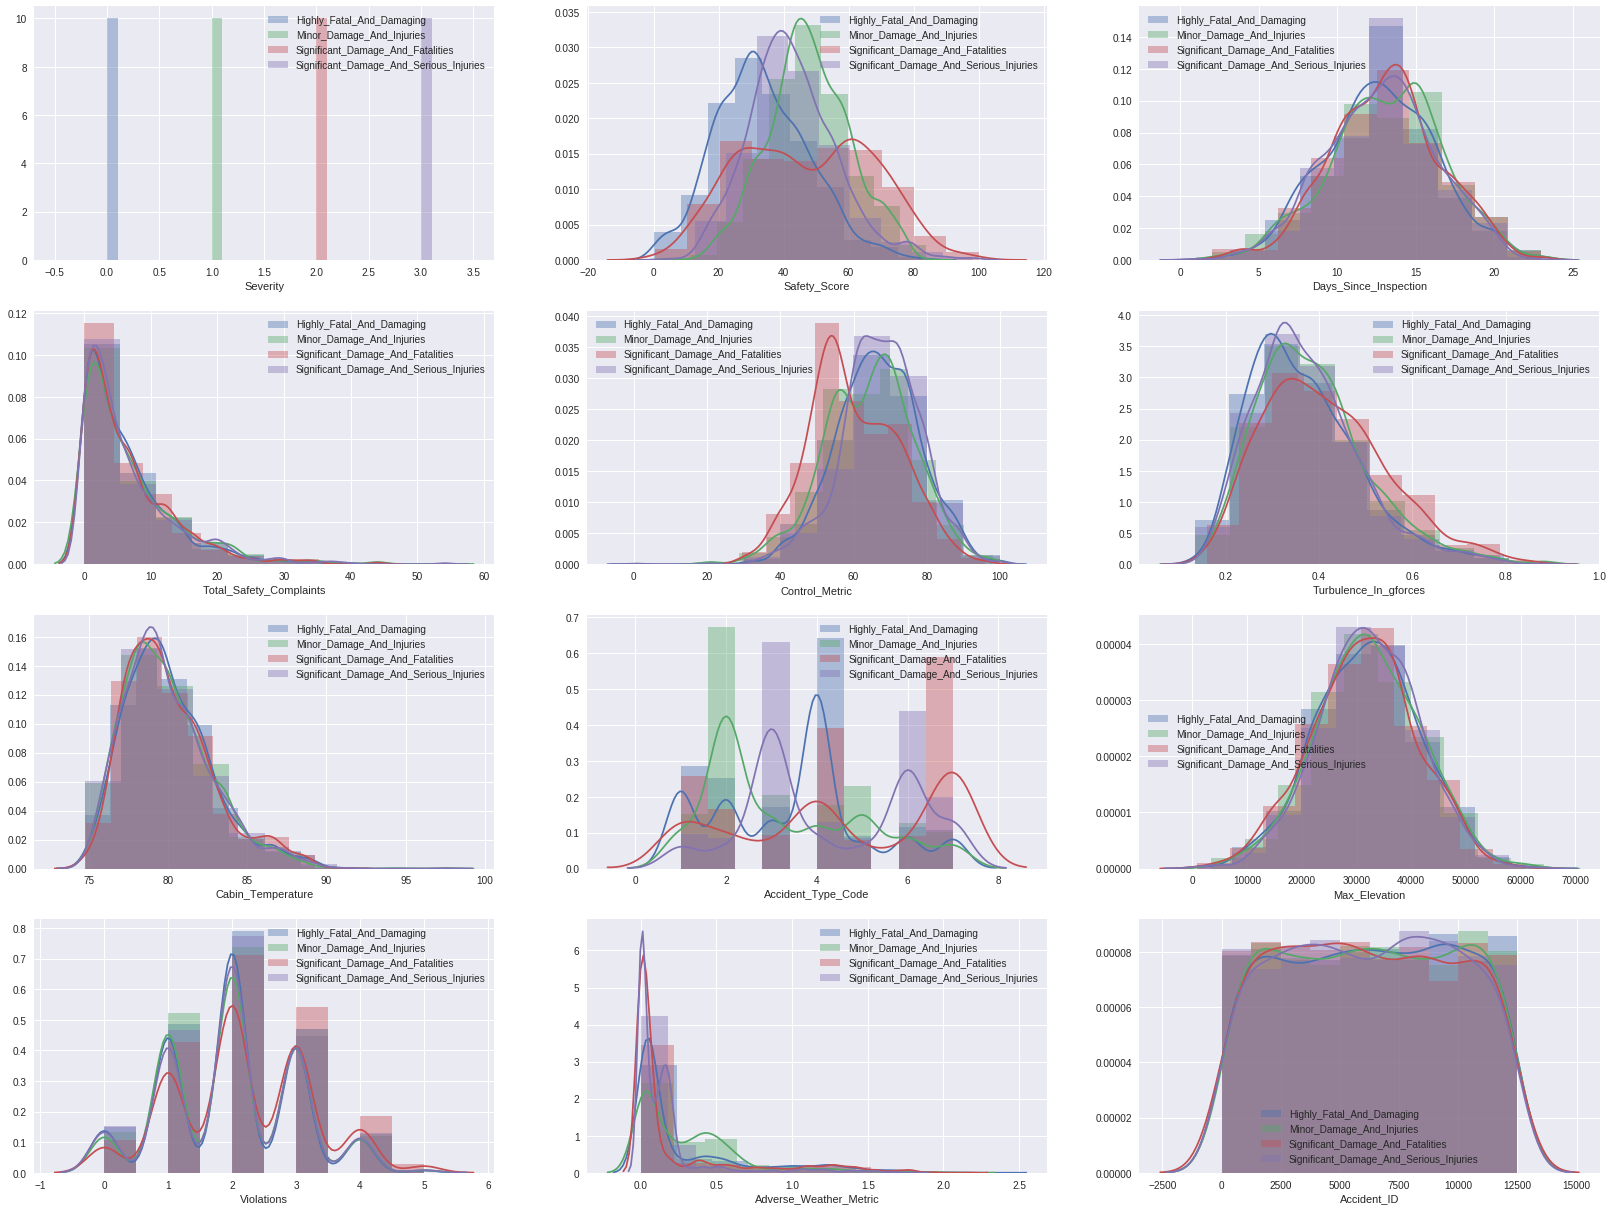

In [31]:
## status - Health status of the subject (one) - Parkinson's, (zero) - healthy
row = int(np.ceil(len(train.select_dtypes(exclude=['object']).columns)/3))
fig, qaxis = plt.subplots(row,3,figsize=(25,20))
col_d = train.select_dtypes(exclude=['object']).columns
i=0
j=0
k=0
for i in range (len(col_d)):
  
  ## plotting line for zero residual error 
  #plt.hlines(y = 0, xmin = 0, xmax = 100, linewidth = 2)
      
  ax= sns.distplot(train[(train['Severity']==0)==True][col_d[i]],bins=10,ax = qaxis[j,k],label = [le.inverse_transform([0])[0]])
  ax= sns.distplot(train[(train['Severity']==1)==True][col_d[i]],bins=10,ax = qaxis[j,k],label = [le.inverse_transform([1])[0]])
  ax= sns.distplot(train[(train['Severity']==2)==True][col_d[i]],bins=10,ax = qaxis[j,k],label = [le.inverse_transform([2])[0]])
  ax= sns.distplot(train[(train['Severity']==3)==True][col_d[i]],bins=10,ax = qaxis[j,k],label = [le.inverse_transform([3])[0]])
  
  ax.legend()
  #ax.set_title("{} DISTRIBUTION".format(col_d[i]), fontsize = 8)
  k=k+1
  j=j
  if k>=3:
    j=j+1
    k=0   
   

In [0]:

# sns.pairplot(train,diag_kind='kde',hue='Severity')

In [0]:
#################### 3- Correlation Matrix with Heatmap ####################################

#correlation heatmap of dataset
def correlation_heatmap(df):
    fig , ax = plt.subplots(figsize =(15,10))
    colormap = sns.diverging_palette(220, 10, as_cmap = True)
    
    _ = sns.heatmap(df.corr(),cmap = colormap,square=True,cbar_kws={'shrink':.5 }, ax=ax,annot=True,linewidths=0.1,vmax=0.3, linecolor='white',annot_kws={'fontsize':12 } )
    
    plt.title('Pearson Correlation of Features', y=1.05, size=15)

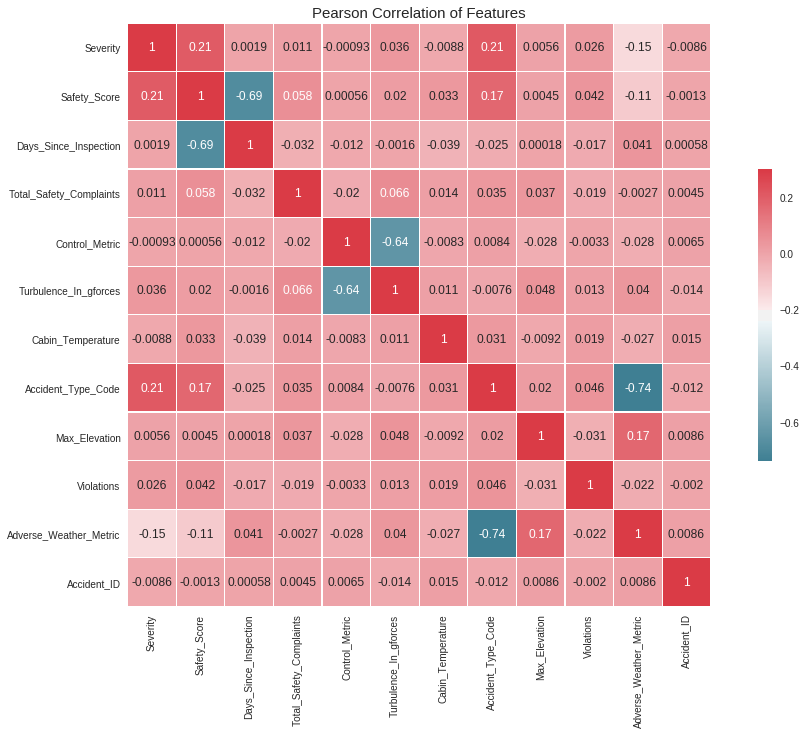

In [34]:
correlation_heatmap(train)

In [35]:
################################ OUTLIERS DETECTION #################################
out_compare = pd.DataFrame(columns=['Column_name'])

col=train.select_dtypes(exclude='object').columns

for i in range(len(col)):
  factor=2
  upper_lmt=train[col[i]].mean()+train[col[i]].std()*factor
  lower_lmt=train[col[i]].mean()-train[col[i]].std()*factor
  out_compare.loc[i,'Column_name']=col[i]
  out_compare.loc[i,'upper_lmt']=upper_lmt
  out_compare.loc[i,'lower_lmt']=lower_lmt
  out_compare.loc[i,'upper_outlier(%)']='{0:=5.2f} %'.format((train[(train[col[i]]>upper_lmt)==True][col[i]].count()/train[col[i]].count())*100)
  out_compare.loc[i,'lower_outlier(%)']='{0:<5.2f} %'.format((train[(train[col[i]]<lower_lmt)==True][col[i]].count()/train[col[i]].count())*100)


out_compare = out_compare.sort_values(by=['upper_outlier(%)','lower_outlier(%)'],ascending=False)
out_compare.set_index('Column_name',inplace=True)
out_compare

#Capping the outlier rows with Percentiles
#upper_lim = data['column'].quantile(.95)
#lower_lim = data['column'].quantile(.05)

,upper_lmt,lower_lmt,upper_outlier(%),lower_outlier(%)
Column_name,,,,
Adverse_Weather_Metric,1.017891,-0.506621,7.51 %,0.00 %
Total_Safety_Complaints,20.508263,-7.379663,5.02 %,0.00 %
Cabin_Temperature,85.488809,74.449853,4.57 %,0.00 %
Turbulence_In_gforces,0.624097,0.138893,4.31 %,0.08 %
Safety_Score,74.152549,9.600263,2.96 %,1.52 %
Max_Elevation,50865.793674,13137.812891,2.03 %,2.48 %
Control_Metric,88.911193,41.379455,1.73 %,2.88 %
Days_Since_Inspection,20.010706,5.851494,1.05 %,1.64 %
Violations,4.092161,-0.067761,0.62 %,0.00 %


In [0]:
######################### FEATURE SELECTION #########################################

In [37]:
# pearson's correlation feature selection for numeric input and numeric output
from sklearn.datasets import make_regression
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=f_regression, k=10)
fit = bestfeatures.fit(train.drop(columns=['Accident_ID','Severity']),train['Severity'])
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(train.drop(columns=['Accident_ID','Severity']).columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(50,'Score'))  #print 10 best features

                     Specs       Score
6       Accident_Type_Code  471.441124
0             Safety_Score  439.830156
9   Adverse_Weather_Metric  242.698173
4    Turbulence_In_gforces   12.957583
8               Violations    6.946072
2  Total_Safety_Complaints    1.132479
5        Cabin_Temperature    0.777576
7            Max_Elevation    0.310445
1    Days_Since_Inspection    0.034530
3           Control_Metric    0.008656


[0.2140332  0.15718521 0.04782327 0.1362791  0.068428   0.05067997
 0.12119023 0.04713666 0.03361149 0.08038629 0.04324658]


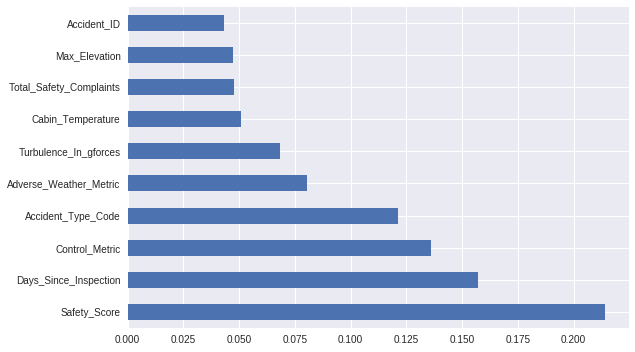

In [38]:
import pandas as pd
import numpy as np
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()

model.fit(train.drop(columns=['Severity']),train['Severity'])
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=train.drop(columns=['Severity']).columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

In [39]:
train.shape

(10000, 12)

In [0]:
# sns.pairplot(train,diag_kind='kde',hue='Severity')

In [0]:
#################################################################  *********  ONE HOT ENCODING ********* ####################################################################################

In [0]:
#train_dummy = pd.concat([train,pd.get_dummies(train['Accident_Type_Code'], prefix='ATC',dummy_na=False)],axis=1)
#train_dummy = pd.concat([train_dummy,pd.get_dummies(train_dummy['Violations'], prefix='VIO',dummy_na=False)],axis=1)


In [0]:
#train_dummy.head(4)

In [0]:
#train_dummy.drop(columns=['Accident_Type_Code','Violations'],axis=1,inplace=True)

In [0]:
#test_dummy = pd.concat([test,pd.get_dummies(test['Accident_Type_Code'], prefix='ATC',dummy_na=False)],axis=1)
#test_dummy = pd.concat([test_dummy,pd.get_dummies(test_dummy['Violations'], prefix='VIO',dummy_na=False)],axis=1)


In [0]:
#test_dummy.drop(columns=['Accident_Type_Code','Violations'],axis=1,inplace=True)

In [0]:
#test_dummy.head(4)

In [46]:
np.sort(train['Accident_Type_Code'].unique())

array([1, 2, 3, 4, 5, 6, 7])

In [47]:
Accident_Type_Code_dict = train.Accident_Type_Code.value_counts().to_dict()  ## FREQUENCY ENCODING
Accident_Type_Code_dict

{1: 1171, 2: 1791, 3: 1752, 4: 2057, 5: 738, 6: 1215, 7: 1276}

In [0]:
train['Accident_Type_Code'] = train['Accident_Type_Code'].map(lambda x : Accident_Type_Code_dict[x] )

In [49]:
np.sort(train['Accident_Type_Code'].unique())

array([ 738, 1171, 1215, 1276, 1752, 1791, 2057])

In [50]:
Accident_Type_Code_dict_test = test.Accident_Type_Code.value_counts().to_dict()  ## FREQUENCY ENCODING
Accident_Type_Code_dict_test

{1: 282, 2: 407, 3: 450, 4: 548, 5: 203, 6: 289, 7: 321}

In [0]:
test['Accident_Type_Code'] = test['Accident_Type_Code'].map(lambda x : Accident_Type_Code_dict_test[x] )

In [52]:
np.sort(test['Accident_Type_Code'].unique())

array([203, 282, 289, 321, 407, 450, 548])

[0.21384615 0.15636045 0.04711445 0.13382649 0.0678928  0.05048359
 0.11737699 0.04750334 0.03374623 0.08864056 0.04320895]


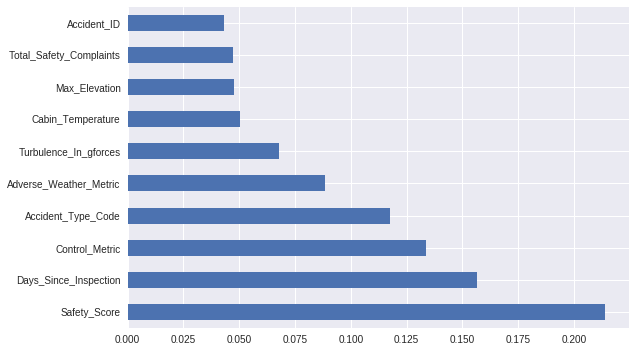

In [53]:
import pandas as pd
import numpy as np
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()

model.fit(train.drop(columns=['Severity']),train['Severity'])
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=train.drop(columns=['Severity']).columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

In [0]:
#################################################################  *********  CREATING THE MODEL ********* ####################################################################################

In [55]:
train.columns

Index(['Severity', 'Safety_Score', 'Days_Since_Inspection',
       'Total_Safety_Complaints', 'Control_Metric', 'Turbulence_In_gforces',
       'Cabin_Temperature', 'Accident_Type_Code', 'Max_Elevation',
       'Violations', 'Adverse_Weather_Metric', 'Accident_ID'],
      dtype='object')

In [0]:
# X = train.drop(columns=['Severity','Accident_ID','Adverse_Weather_Metric','Accident_Type_Code','Total_Safety_Complaints','Violations','Cabin_Temperature','Max_Elevation'],axis=1)

In [0]:
train['Days_Since_Inspection'] = train['Days_Since_Inspection'].map(lambda x : x*24)

In [0]:
test['Days_Since_Inspection'] = test['Days_Since_Inspection'].map(lambda x : x*24)

In [59]:
train.drop(columns=['Severity','Accident_ID','Total_Safety_Complaints','Violations','Cabin_Temperature','Max_Elevation','Turbulence_In_gforces','Accident_Type_Code','Adverse_Weather_Metric'],axis=1)

,Safety_Score,Days_Since_Inspection,Control_Metric
0,49.223744,336,71.285324
1,62.465753,240,72.288058
2,63.059361,312,66.362808
3,48.082192,264,74.703737
4,26.484018,312,47.948952
...,...,...,...
9995,56.118721,192,63.445761
9996,40.365297,240,62.169553
9997,27.853881,408,69.598906
9998,56.210046,192,39.835916


In [0]:
#train_df = train.drop(columns=['Accident_ID','Adverse_Weather_Metric','Accident_Type_Code','Total_Safety_Complaints','Violations','Cabin_Temperature','Max_Elevation','Turbulence_In_gforces'],axis=1)

In [0]:
########################################## OUTLIERS ################################################################################

In [0]:
# sns.pairplot(train_df,diag_kind='kde',hue='Severity')

In [0]:
from scipy.stats import zscore

# train = train.apply(zscore)

In [0]:
X = train.drop(columns=['Severity','Accident_ID','Total_Safety_Complaints','Violations','Cabin_Temperature','Max_Elevation','Turbulence_In_gforces','Accident_Type_Code','Adverse_Weather_Metric'],axis=1)

In [0]:
Y =  train['Severity']

In [0]:
X_test = test.drop(columns=['Accident_ID','Total_Safety_Complaints','Violations','Cabin_Temperature','Max_Elevation','Turbulence_In_gforces','Accident_Type_Code','Adverse_Weather_Metric'],axis=1)

In [71]:
test.drop(columns=['Accident_ID','Total_Safety_Complaints','Violations','Cabin_Temperature','Max_Elevation','Turbulence_In_gforces','Accident_Type_Code','Adverse_Weather_Metric'],axis=1)

,Safety_Score,Days_Since_Inspection,Control_Metric
0,19.497717,384,72.151322
1,58.173516,360,64.585232
2,33.287671,360,64.721969
3,3.287671,504,66.362808
4,10.867580,432,56.107566
...,...,...,...
2495,68.127854,192,49.680948
2496,54.840183,216,71.194166
2497,36.712329,336,91.203282
2498,38.721461,312,73.154057


In [0]:
#Common Model Algorithms
from sklearn import svm, tree, linear_model, neighbors, naive_bayes, ensemble, discriminant_analysis, gaussian_process
from xgboost import XGBClassifier

#Common Model Helpers
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.model_selection import train_test_split,cross_val_score
import io
from datetime import datetime
import time

In [0]:
X_train,X_valid,y_train,y_valid = train_test_split(X,Y, test_size = 0.3,shuffle = True ,random_state=10)

In [74]:
print('X_train shape -',X_train.shape)
print('y_train shape -',y_train.shape)
print('X_valid shape -',X_valid.shape)
print('y_valid shape -',y_valid.shape)

X_train shape - (7000, 3)
y_train shape - (7000,)
X_valid shape - (3000, 3)
y_valid shape - (3000,)


In [0]:
from sklearn import preprocessing

mm_scaler = preprocessing.MinMaxScaler()    #  MinMaxScaler() #StandardScaler
X_train_minmax = mm_scaler.fit_transform(X_train)
X_valid_minmax = mm_scaler.transform(X_valid)
X_test_minmax = mm_scaler.transform(X_test)

In [0]:
# X_train_minmax = X_train.apply(zscore)
# X_valid_minmax = X_valid.apply(zscore)
# X_test_minmax =  X_test.apply(zscore)

In [0]:
  #Machine Learning Algorithm (MLA) Selection and Initialization
  
  MLA =  [ #Ensemble Methods                                              
          ensemble.AdaBoostClassifier(),                                 
          ensemble.BaggingClassifier(),                                  
          ensemble.ExtraTreesClassifier() ,                              
          ensemble.GradientBoostingClassifier(),                         
          ensemble.RandomForestClassifier(),
          #CatBoostRegressor(iterations=50, depth=3, learning_rate=0.1, loss_function='RMSE')
          #gaussian_process.GaussianProcessClassifier(),

          #Navies Bayes                                                
          naive_bayes.GaussianNB(),                                      

          #Nearest Neighbor                                              
          #neighbors.KNeighborsClassifier(),                              

          #SVM                                                           
          svm.SVC(),                                     
        
          #Trees                                                         
          tree.DecisionTreeClassifier(max_depth=10),
      

      
          XGBClassifier() 

  ]




In [0]:
MLA_columns = ['MLA_Name']
MLA_compare = pd.DataFrame(columns = MLA_columns)

In [79]:

row_index = 0
import pytz
from datetime import datetime
# assuming now contains a timezone aware datetime
now = datetime.now()
tz = pytz.timezone('Asia/Kolkata')
your_now = now.astimezone(tz)
print (your_now)
start = your_now
# print the processor time in seconds  
print("At the beginning of the calculation")  
print("Processor time (in seconds):", start, "\n")  
for alg in MLA:
    #X_train,X_valid,y_train,y_valid 

    #set name and parameters
    MLA_name = alg.__class__.__name__
    MLA_compare.loc[row_index, 'MLA_Name'] = MLA_name
    #MLA_compare.loc[row_index1, 'MLA_Parameters'] = str(alg.get_params())   
 
    d = alg.fit(X_train_minmax, y_train)
    #MLA_compare[MLA_name] = alg.predict(X_valid)
    #MLA_compare.loc[row_index1, 'MLA_Intercept'] =  alg.intercept_
    MLA_compare.loc[row_index, 'Actual_Y_Shape'] =y_valid.shape
    MLA_compare.loc[row_index, 'confusion_matrix'] = str(metrics.confusion_matrix(y_valid,alg.predict(X_valid_minmax)))
    MLA_compare.loc[row_index, 'accuracy_score'] = metrics.accuracy_score(y_valid,alg.predict(X_valid_minmax))
    confusion_matrix = metrics.confusion_matrix(y_valid,alg.predict(X_valid_minmax))
    MLA_compare.loc[row_index, 'f1_score'] =  metrics.f1_score(y_valid,alg.predict(X_valid_minmax),average='weighted') 
    MLA_compare.loc[row_index, 'Recall'] =  metrics.recall_score(y_valid,alg.predict(X_valid_minmax),average='weighted')
    MLA_compare.loc[row_index, 'precision_score'] =  metrics.precision_score(y_valid,alg.predict(X_valid_minmax),average='weighted')
    MLA_compare.loc[row_index, 'mean_absolute_error'] = metrics.mean_absolute_error(y_valid, alg.predict(X_valid_minmax))
    MLA_compare.loc[row_index, 'mean_squared_error'] = metrics.mean_squared_error(y_valid, alg.predict(X_valid_minmax))
    MLA_compare.loc[row_index, 'root_mean_squared_error'] = np.sqrt(metrics.mean_squared_error(y_valid, alg.predict(X_valid_minmax)))
    #MLA_compare.loc[row_index1, 'explained_variance_score'] = explained_variance_score(test1_y, alg.predict(test1_x))
    #MLA_predict.loc[row_index, 'Timestamp'] = str(datetime.now().strftime('%Y-%m-%d %H:%M:%S'))
    

   
    row_index+=1


now = datetime.now()
tz = pytz.timezone('Asia/Kolkata')
your_now = now.astimezone(tz)
print (your_now)
end = your_now

print("Time taken by Algo to run - {}".format(end-start))


2020-02-08 14:03:28.545583+05:30
At the beginning of the calculation
Processor time (in seconds): 2020-02-08 14:03:28.545583+05:30 

2020-02-08 14:03:39.032414+05:30
Time taken by Algo to run - 0:00:10.486831


In [80]:
MLA_compare.sort_values(by = ['f1_score','accuracy_score','precision_score'], ascending = False, inplace = True)
MLA_compare

,MLA_Name,Actual_Y_Shape,confusion_matrix,accuracy_score,f1_score,Recall,precision_score,mean_absolute_error,mean_squared_error,root_mean_squared_error
4,RandomForestClassifier,3000.0,[[903 8 10 21]\n [ 10 716 6 2]\n [ 5 ...,0.968000,0.967982,0.968000,0.968009,0.066333,0.160333,0.400416
1,BaggingClassifier,3000.0,[[916 4 7 15]\n [ 14 711 6 3]\n [ 8 ...,0.966000,0.965998,0.966000,0.966101,0.067667,0.158333,0.397911
2,ExtraTreesClassifier,3000.0,[[902 10 9 21]\n [ 9 718 5 2]\n [ 7 ...,0.965333,0.965319,0.965333,0.965374,0.069667,0.166333,0.407840
7,DecisionTreeClassifier,3000.0,[[899 7 12 24]\n [ 21 701 5 7]\n [ 7 ...,0.955667,0.955670,0.955667,0.955687,0.084667,0.192667,0.438938
6,SVC,3000.0,[[832 59 27 24]\n [ 9 709 5 11]\n [ 10 ...,0.927000,0.926956,0.927000,0.929028,0.129000,0.269667,0.519294
3,GradientBoostingClassifier,3000.0,[[769 127 18 28]\n [ 4 679 43 8]\n [ 15 ...,0.899333,0.899433,0.899333,0.905253,0.152000,0.284667,0.533542
8,XGBClassifier,3000.0,[[744 151 21 26]\n [ 27 689 14 4]\n [ 12 ...,0.893333,0.893373,0.893333,0.900425,0.156667,0.285333,0.534166
5,GaussianNB,3000.0,[[597 165 23 157]\n [130 304 47 253]\n [178 ...,0.445333,0.432797,0.445333,0.444407,1.055000,2.359667,1.536121
0,AdaBoostClassifier,3000.0,[[586 77 80 199]\n [165 62 32 475]\n [226 ...,0.453333,0.383235,0.453333,0.379642,0.967000,1.961000,1.400357


In [81]:
train.shape

(10000, 12)

In [0]:
parameteres = {'bootstrap':[True,False], 'criterion':['gini','entropy'], 'max_depth':[50,100,110,140,200,250,500,50], 'min_samples_split':[2,3,4], 'n_estimators':[50,100,150,200,250,400]}

In [0]:
#model =   ensemble.RandomForestClassifier(random_state=3232)

In [0]:
from sklearn.model_selection import GridSearchCV

In [0]:
grid = GridSearchCV(model, param_grid=parameteres, cv=5)

In [86]:
now = datetime.now()
tz = pytz.timezone('Asia/Kolkata')
your_now = now.astimezone(tz)
print (your_now)

2020-02-08 14:03:39.147689+05:30


In [0]:
# grid.fit(X_train_minmax, y_train)


In [0]:
 # print ("score = %3.2f" %(grid.score(X_valid_minmax,y_valid)))


In [0]:
# print (grid.best_params_)

In [0]:
rf =  ensemble.RandomForestClassifier(bootstrap=False,max_depth=50,criterion='gini',min_samples_split=2,n_estimators=250)  # alg    # ensemble.AdaBoostRegressor()   ## tree.DecisionTreeRegressor() ,   ensemble.RandomForestRegressor() ,  svm.SVR() , ensemble.GradientBoostingRegressor()

In [89]:
rf.__class__.__name__

'RandomForestClassifier'

In [90]:
rf.fit(X_train_minmax,y_train)

RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=50, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=250,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [91]:
metrics.confusion_matrix(y_valid,rf.predict(X_valid_minmax))

array([[902,   9,  10,  21],
       [  9, 718,   4,   3],
       [  5,   2, 498,   2],
       [ 13,   8,   2, 794]])

In [92]:
metrics.accuracy_score(y_valid,rf.predict(X_valid_minmax))

0.9706666666666667

In [93]:
print(metrics.classification_report(y_valid,rf.predict(X_valid_minmax)))

              precision    recall  f1-score   support

           0       0.97      0.96      0.96       942
           1       0.97      0.98      0.98       734
           2       0.97      0.98      0.98       507
           3       0.97      0.97      0.97       817

    accuracy                           0.97      3000
   macro avg       0.97      0.97      0.97      3000
weighted avg       0.97      0.97      0.97      3000



In [0]:
F1_SCore = metrics.classification_report(y_valid,rf.predict(X_valid_minmax))

In [95]:

metrics.precision_score(y_valid,rf.predict(X_valid_minmax),average='weighted')

0.9706708452449456

In [0]:
#################################################################  *********  TEST DATA ********* ####################################################################################

In [0]:
X_test_minmax = mm_scaler.transform(X_test)

In [111]:
y_test_pred = rf.predict(X_test_minmax)
print(y_test_pred)

[0 2 3 ... 3 3 0]


In [112]:
test.head()

,Safety_Score,Days_Since_Inspection,Total_Safety_Complaints,Control_Metric,Turbulence_In_gforces,Cabin_Temperature,Accident_Type_Code,Max_Elevation,Violations,Adverse_Weather_Metric,Accident_ID
0,19.497717,384,6,72.151322,0.388959,78.32,548,37949.724386,2,0.069692,1
1,58.173516,360,3,64.585232,0.250841,78.60,321,30194.805567,2,0.002777,10
2,33.287671,360,3,64.721969,0.336669,86.96,289,17572.925484,1,0.004316,14
3,3.287671,504,5,66.362808,0.421775,80.86,450,40209.186341,2,0.199990,17
4,10.867580,432,2,56.107566,0.313228,79.22,407,35495.525408,2,0.483696,21


In [0]:
df_results = pd.concat([test['Accident_ID'],pd.Series(y_test_pred,name='Severity')],axis=1)

In [114]:
df_results.head()

,Accident_ID,Severity
0,1,0
1,10,2
2,14,3
3,17,1
4,21,2


In [0]:
#target_decoding = {1:'Minor_Damage_And_Injuries',2:'Significant_Damage_And_Fatalities',3:'Significant_Damage_And_Serious_Injuries',4:'Highly_Fatal_And_Damaging'}

In [0]:
#df_results['Severity'].replace(target_decoding,inplace=True)

In [0]:
df_results['Severity'] =  le.inverse_transform(df_results['Severity'])

In [118]:
df_results.head()

,Accident_ID,Severity
0,1,Highly_Fatal_And_Damaging
1,10,Significant_Damage_And_Fatalities
2,14,Significant_Damage_And_Serious_Injuries
3,17,Minor_Damage_And_Injuries
4,21,Significant_Damage_And_Fatalities


In [0]:
import pytz
now = datetime.now()
tz = pytz.timezone('Asia/Kolkata')
timestamp = now.astimezone(tz)

In [0]:
from google.colab import files
df_results.to_csv('/content/drive/My Drive/Hackathon/AIRPLANE ACCIDENT/Submissions/' + str(timestamp)+str('3-FEB-Hackerearth_Airplane-accident-severity-_') + str(rf.__class__.__name__) + '_'+ '.csv',index=False)

In [121]:
import pytz
now = datetime.now()
tz = pytz.timezone('Asia/Kolkata')
now.astimezone(tz)

datetime.datetime(2020, 2, 8, 14, 4, 7, 864888, tzinfo=<DstTzInfo 'Asia/Kolkata' IST+5:30:00 STD>)

In [0]:
files.download('/content/drive/My Drive/Hackathon/AIRPLANE ACCIDENT/Submissions/' + str(timestamp)+str('3-FEB-Hackerearth_Airplane-accident-severity-_') + str(rf.__class__.__name__) + '_'+ '.csv')